In [1]:
__authors__ = "Akshay Agarwal, Manish Das, Jaro Habr, Parag Kanade"
__version__ = "XCS229ii, Stanford, Spring 2021"

# Melanoma Detection Dataset

In [5]:
import os

DATA_PATH = os.path.join(os.getcwd(), "data")

TRAINING_PATH = os.path.join(DATA_PATH, "1-training")
TRAINING_MASK_PATH = os.path.join(DATA_PATH, "1-training_masks")
VALIDATION_PATH = os.path.join(DATA_PATH, "2-validation")
VALIDATION_MASK_PATH = os.path.join(DATA_PATH, "2-validation")
TEST_PATH = os.path.join(DATA_PATH, "3-test")

### Image & Masks

In [23]:
train_images_count = len(os.listdir(TRAINING_PATH))
train_masks_count = len(os.listdir(TRAINING_MASK_PATH))
validation_images_count = len(os.listdir(VALIDATION_PATH))
validation_masks_count = len(os.listdir(VALIDATION_MASK_PATH))
test_images_count = len(os.listdir(TEST_PATH))

total_images_count = train_images_count + validation_images_count + test_images_count

train_images_percentage = round(train_images_count / total_images_count * 100, 2)
validation_images_percentage = round(validation_images_count / total_images_count * 100, 2)
test_images_percentage = round(test_images_count / total_images_count * 100, 2)

print(f"train images: {train_images_count}")
print(f"train masks: {train_masks_count}")
print(f"validation images: {validation_images_count}")
print(f"validation masks: {validation_masks_count}")
print(f"test images: {test_images_count}")
print()
print(f"total: {total_images_count}")
print()
print(f"train %: {train_images_percentage}")
print(f"validation %: {validation_images_percentage}")
print(f"test %: {test_images_percentage}")

train images: 2597
train masks: 2596
validation images: 102
validation masks: 102
test images: 1002

total: 3701

train %: 70.17
validation %: 2.76
test %: 27.07


### Image Distribution Graphs

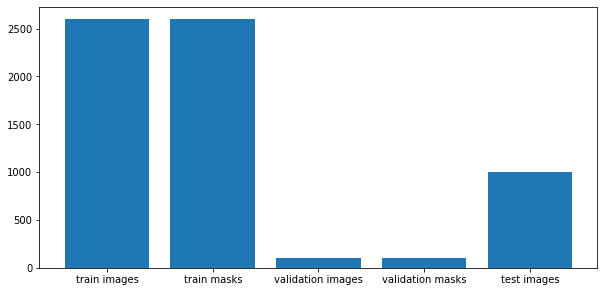

In [8]:
import matplotlib.pyplot as plt

data = {
    "train images": train_images_count,
    "train masks": train_masks_count,
    "validation images": validation_images_count,
    "validation masks": validation_masks_count,
    "test images": test_images_count
}
plt.figure(figsize=(10, 4.8))
plt.bar(*zip(*data.items()))
plt.show()

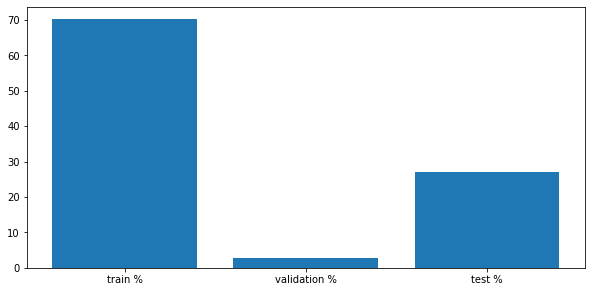

In [9]:
data = {
    "train %": train_images_percentage,
    "validation %": validation_images_percentage,
    "test %": test_images_percentage
}
plt.figure(figsize=(10, 4.8))
plt.bar(*zip(*data.items()))
plt.show()

In [21]:
image_id = "ISIC_0000000"

file_name = f"{image_id}.jpg"
file_mask_name = f"{image_id}_segmentation.png"

image_path = os.path.join(TRAINING_PATH, file_name)
image_mask_path = os.path.join(TRAINING_MASK_PATH, file_mask_name)

### Draw Image and Mask

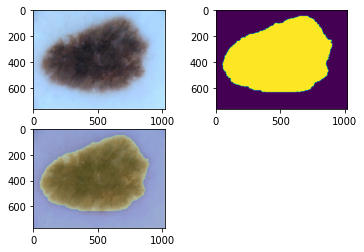

In [22]:
from PIL import Image

image = Image.open(image_path)
mask = Image.open(image_mask_path)

plt.figure()
 
plt.subplot(221)
plt.imshow(image)
 
plt.subplot(222)
plt.imshow(mask)
 
plt.subplot(223)
plt.imshow(image)
plt.imshow(mask, alpha=0.25)
 
plt.show()

### Draw Contour

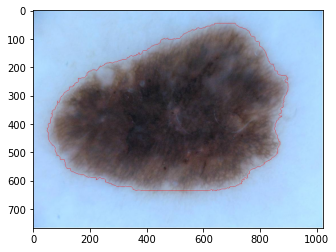

In [20]:
import cv2
import numpy as np

image = cv2.imread(image_path, 1)
mask = cv2.imread(image_mask_path, 0)

contours, _ = cv2.findContours(mask, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
cv2.drawContours(image, contours, -1, (0, 0, 255), 1)

image = image[:, :, ::-1]
image[..., 2] = np.where(mask == 1, 255, image[..., 2])

plt.imshow(image)
plt.show()